In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# Data Cleaning
df = df.drop("CustomerID", axis=1)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [4]:
# Missing values check
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Step 3: Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


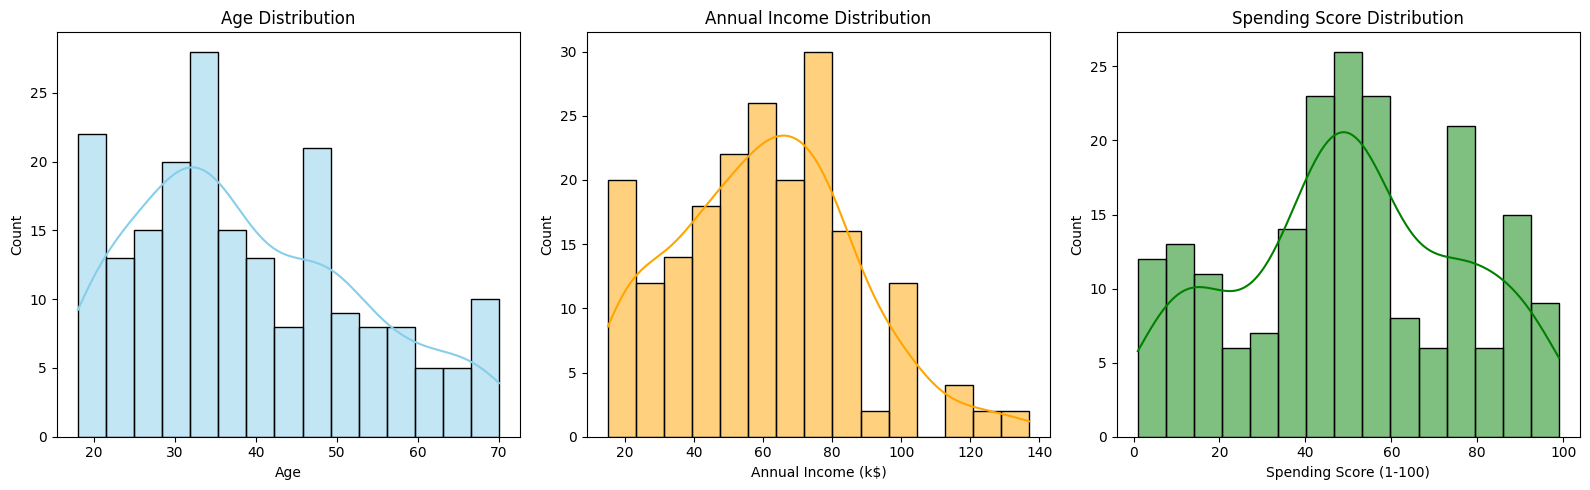

In [8]:
# EXPLORATORY DATA ANALYSIS (EDA)
# --- Univariate Analysis ---
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='orange')
plt.title("Annual Income Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='green')
plt.title("Spending Score Distribution")
plt.tight_layout()
plt.show()


C:\Users\sneha\AppData\Local\Temp\ipykernel_25228\2218881500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


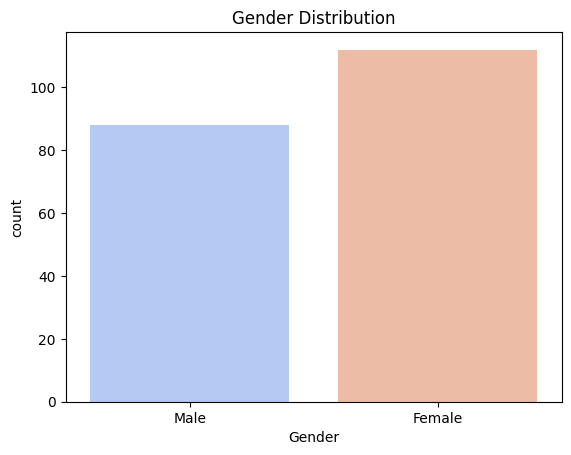

In [9]:
# Gender Distribution
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title("Gender Distribution")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

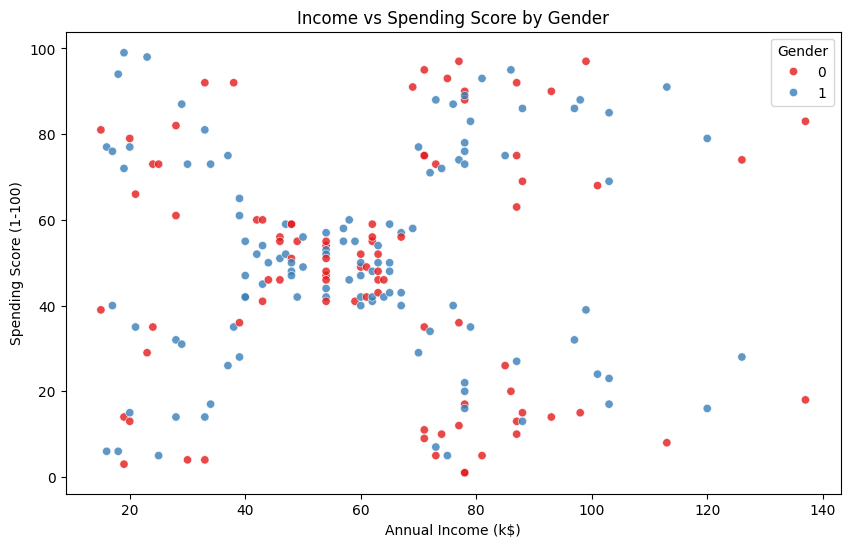

In [10]:
# --- Bivariate Analysis ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,
                hue='Gender', palette='Set1', alpha=0.8)
plt.title("Income vs Spending Score by Gender")
plt.show()

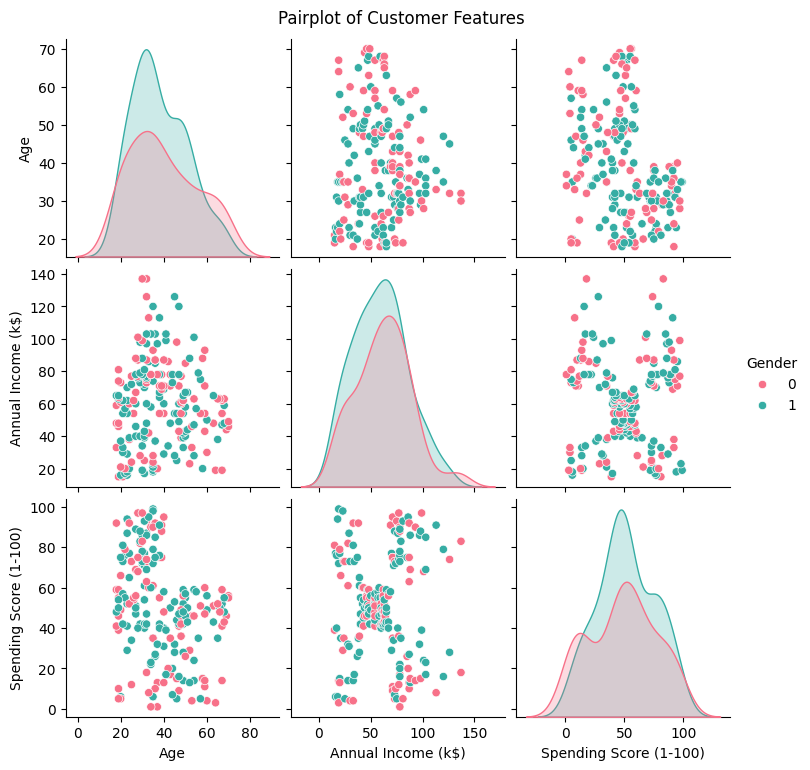

In [11]:
# Pairplot of features
sns.pairplot(df, hue="Gender", palette="husl", diag_kind='kde')
plt.suptitle("Pairplot of Customer Features", y=1.02)
plt.show()

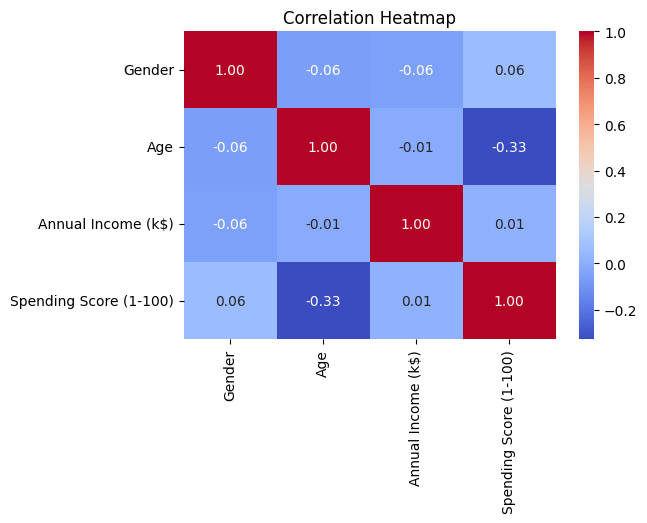

In [12]:
# --- Correlation Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# FEATURE SCALING
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

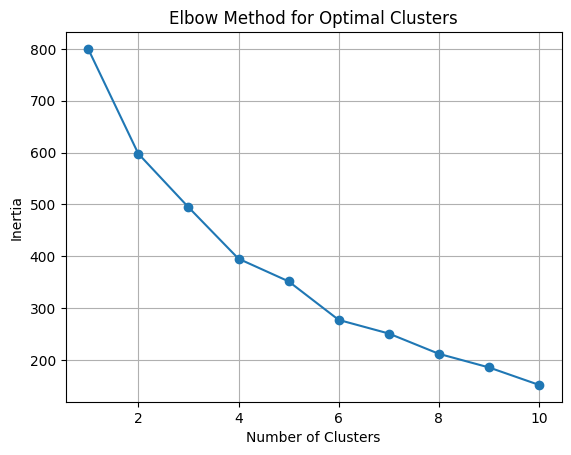

In [14]:
# K-MEANS CLUSTERING
# --- Elbow Method ---
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [15]:
# --- Silhouette Scores ---
print("\nSilhouette Scores:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"k={k} -> score: {score:.3f}")


Silhouette Scores:
k=2 -> score: 0.278
k=3 -> score: 0.258
k=4 -> score: 0.290
k=5 -> score: 0.272
k=6 -> score: 0.335
k=7 -> score: 0.346
k=8 -> score: 0.373
k=9 -> score: 0.388
k=10 -> score: 0.421


In [16]:
# --- Fit KMeans with chosen k ---
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

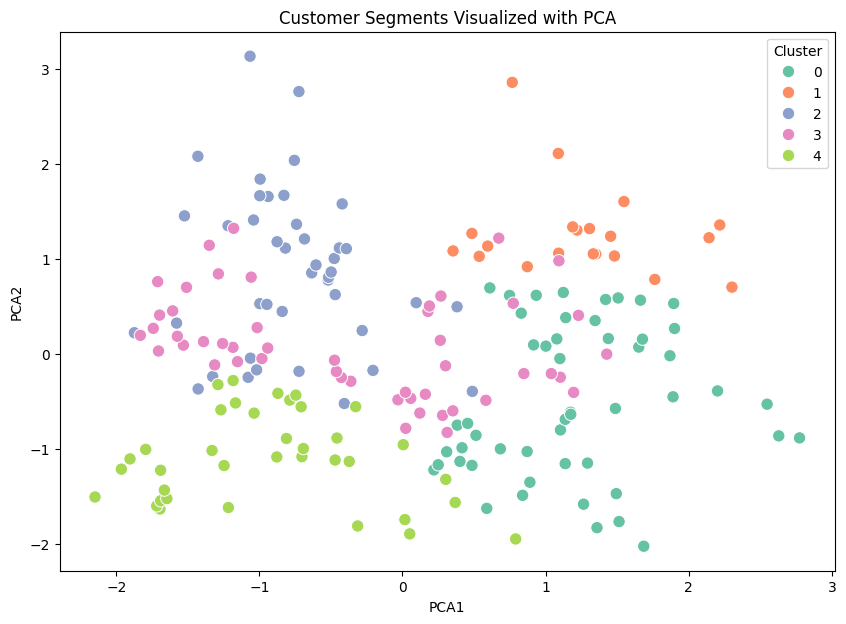

In [17]:
# CLUSTER VISUALIZATION
# --- PCA for 2D visualization ---
pca = PCA(n_components=2)
df[['PCA1', 'PCA2']] = pca.fit_transform(df_scaled)

# 2D Cluster Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=80)
plt.title("Customer Segments Visualized with PCA")
plt.show()

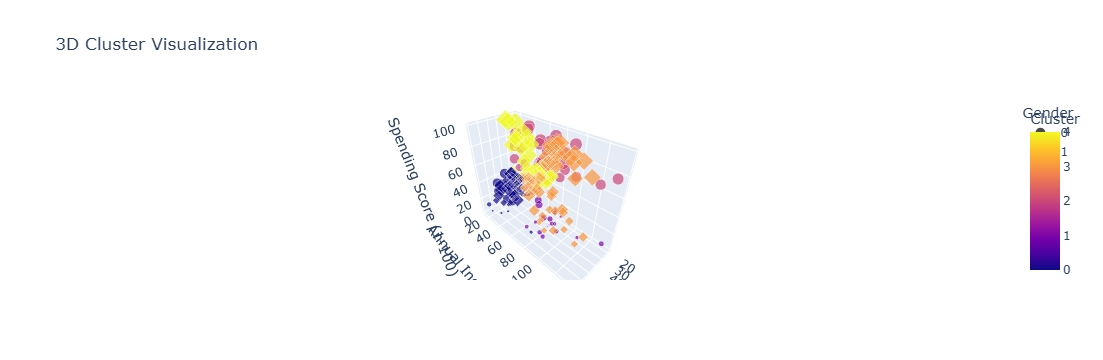

In [18]:
# 3D Cluster Plot (interactive)
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster', symbol='Gender', size='Spending Score (1-100)',
                    title="3D Cluster Visualization")
fig.show()

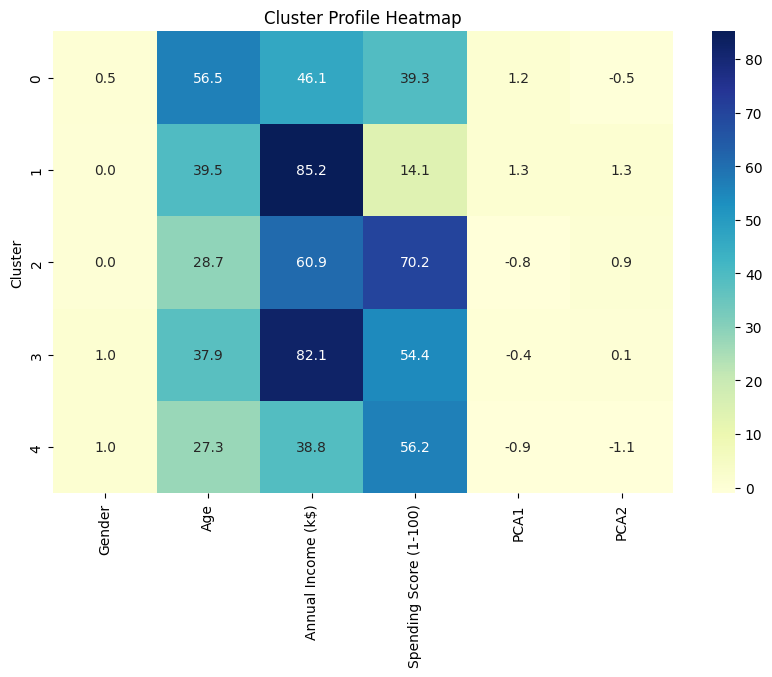

In [19]:
# --- Cluster Profile Heatmap ---
cluster_profiles = df.groupby('Cluster').mean(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profiles, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Cluster Profile Heatmap")
plt.show()

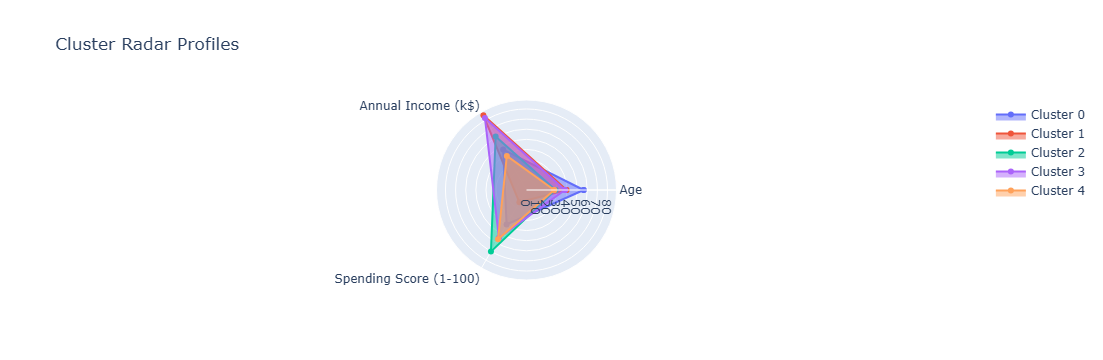

In [20]:
# --- Radar Chart for Cluster Comparison ---
categories = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig = go.Figure()
for i in range(k_optimal):
    values = cluster_profiles.loc[i, categories].values.tolist()
    fig.add_trace(go.Scatterpolar(r=values + [values[0]],
                                  theta=categories + [categories[0]],
                                  fill='toself', name=f'Cluster {i}'))
fig.update_layout(title="Cluster Radar Profiles", polar=dict(radialaxis=dict(visible=True)))
fig.show()

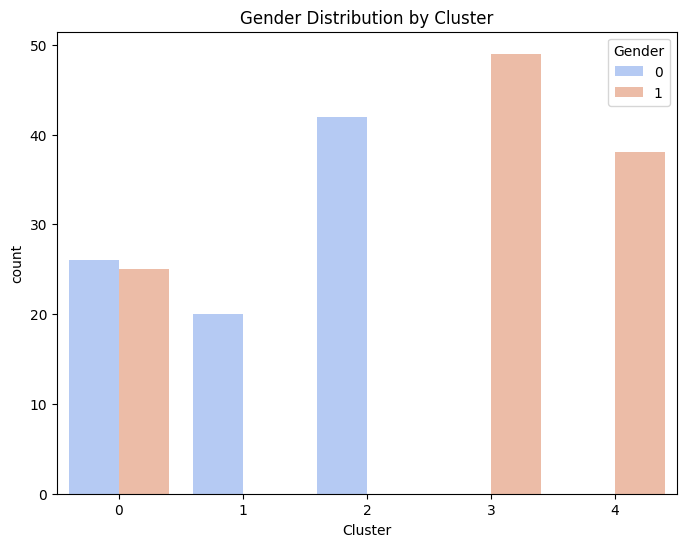

In [21]:
# --- Gender Distribution by Cluster ---
plt.figure(figsize=(8,6))
sns.countplot(x='Cluster', hue='Gender', data=df, palette='coolwarm')
plt.title("Gender Distribution by Cluster")
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_25228\3876364273.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




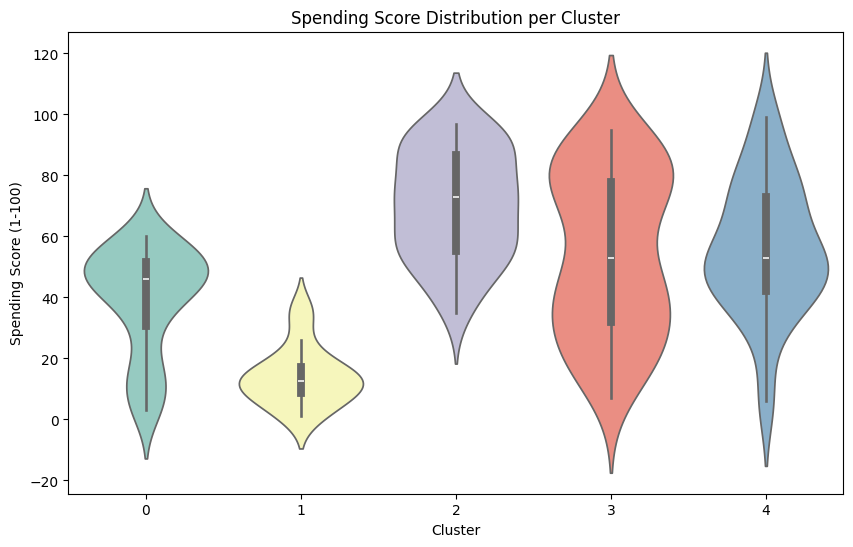

In [22]:
# --- Spending Score Distribution by Cluster ---
plt.figure(figsize=(10,6))
sns.violinplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='Set3')
plt.title("Spending Score Distribution per Cluster")
plt.show()

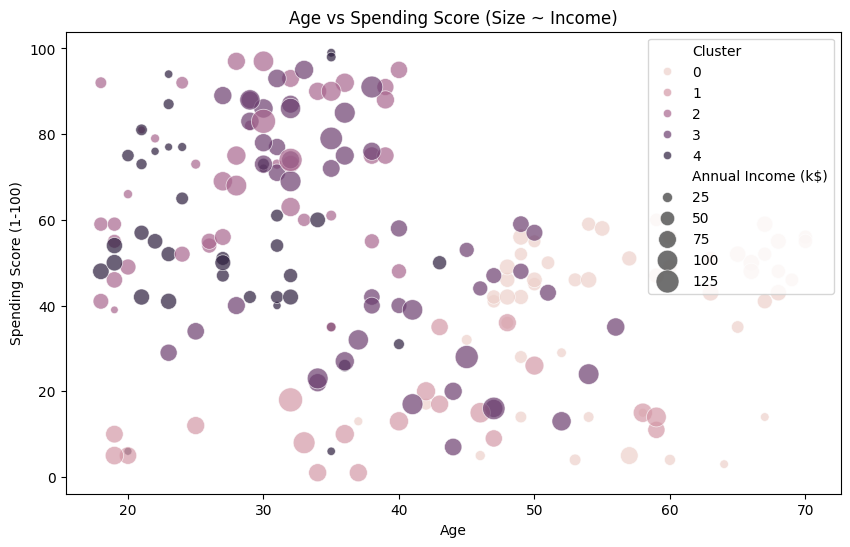

In [23]:
# --- Bubble Plot: Age vs Spending Score ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster',
                size='Annual Income (k$)', data=df, sizes=(30, 300), alpha=0.7)
plt.title("Age vs Spending Score (Size ~ Income)")
plt.show()

In [24]:
# --- Final Cluster Profiles ---
print("\nCluster Profiles:\n", cluster_profiles.round(2))


Cluster Profiles:
          Gender    Age  Annual Income (k$)  Spending Score (1-100)  PCA1  PCA2
Cluster                                                                       
0          0.49  56.47               46.10                   39.31  1.20 -0.51
1          0.00  39.50               85.15                   14.05  1.25  1.28
2          0.00  28.69               60.90                   70.24 -0.77  0.87
3          1.00  37.90               82.12                   54.45 -0.37  0.10
4          1.00  27.32               38.84                   56.21 -0.93 -1.08
